# Ensemble Techniques Project

## Goal

### Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Exploratory Data Report

In [1]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
bank = pd.read_csv('bank-full.csv')

In [61]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [62]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [63]:
bank.shape

(45211, 17)

In [64]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [65]:
# Checking for missing values

bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [66]:
# Checking for duplicates

dupes = bank.duplicated()
sum(dupes)

0

In [67]:
# Displaying skewness

bank.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

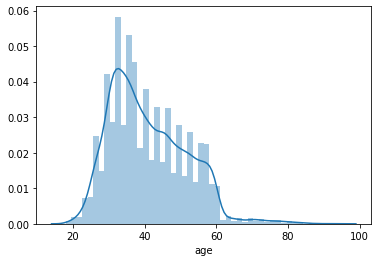

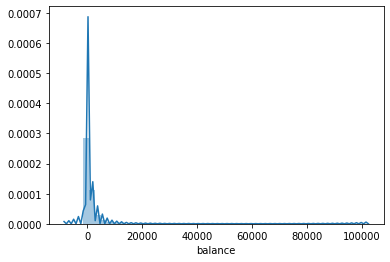

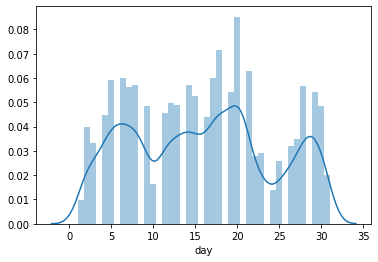

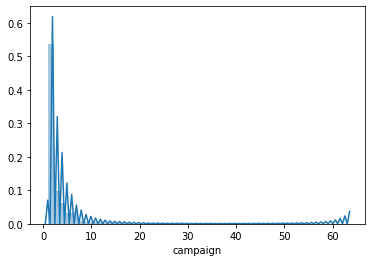

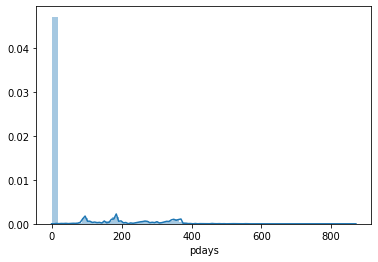

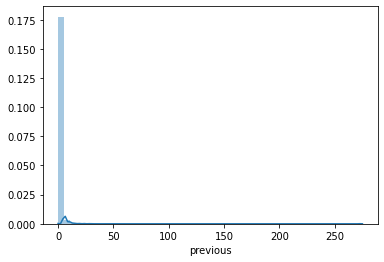

In [83]:
# Plotting continuous variables

cols1 = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
cols2 = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']

for col in cols1:
    sb.distplot(bank[col]);
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

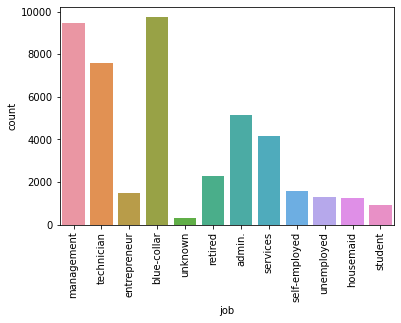

In [84]:
# Plotting categorical variables

sb.countplot(bank['job']);
plt.xticks(rotation=90)

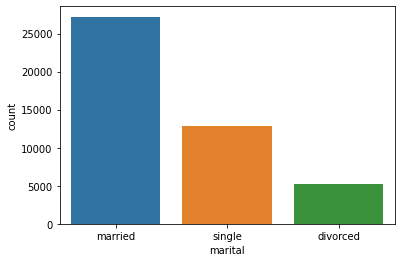

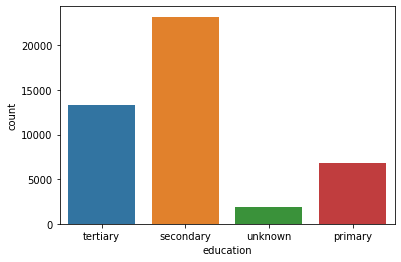

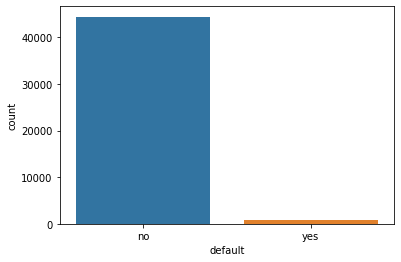

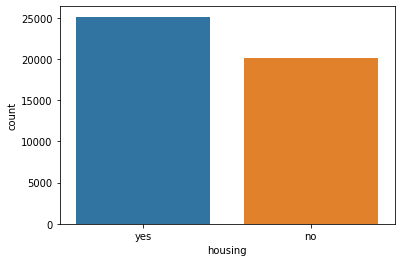

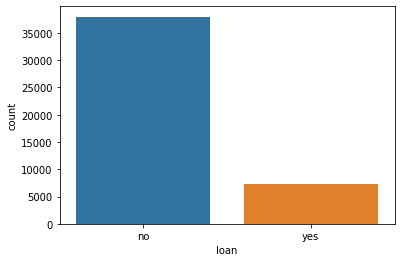

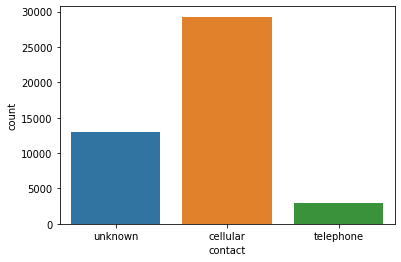

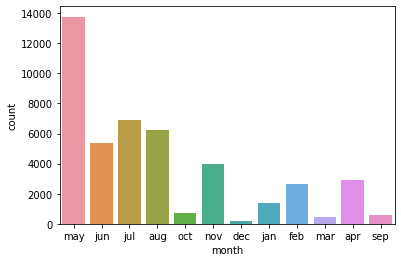

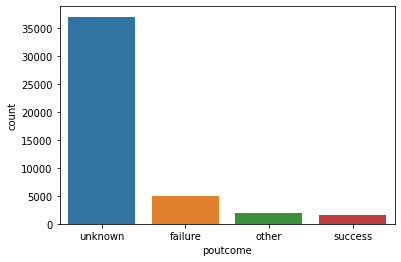

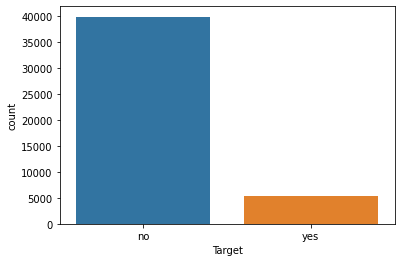

In [85]:
for col in cols2:
    sb.countplot(bank[col]);
    plt.show()

### Insights

#### According to the dataframe info, shape, and null values reports, there are no missing values.

#### The "balance", "pdays", "campaign", "duration", and "previous" variables are questionable, since they appear to be highly positively skewed and have an almost identical distribution. This could potentially affect a predictive model's performance, although they may need to remain if the outliers are significant values.

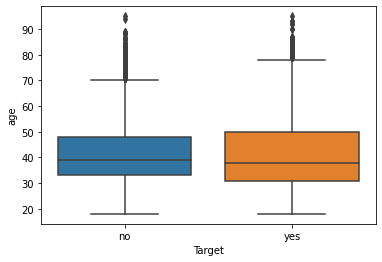

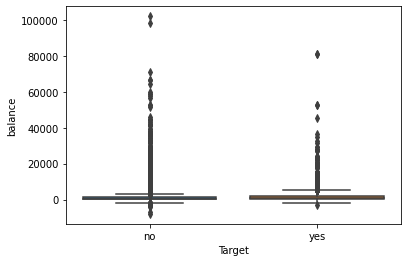

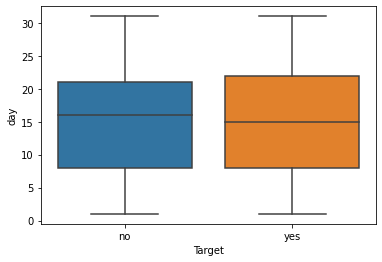

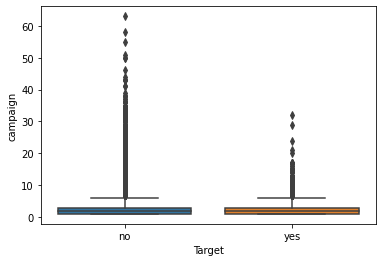

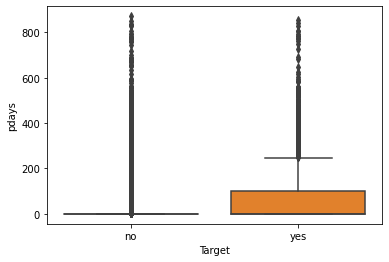

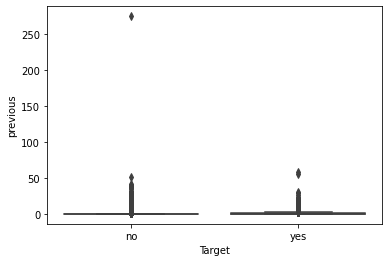

In [86]:
# Bivariate Analysis

for col in cols1:
    sb.boxplot(bank['Target'], bank[col]);
    plt.show()

<AxesSubplot:>

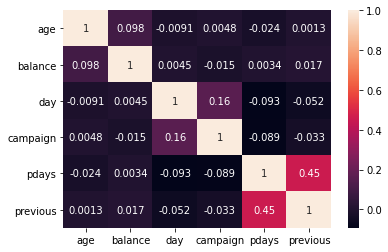

In [87]:
# Displaying correlation heatmap of continuous variables

sb.heatmap(bank[cols1].corr(), annot=True)

### Insights:
#### Since the information accompanying the dataset recommends dropping the "duration" variable if the intention is to have a realistic predictive model, this variable will be dropped.

#### There are no missing values. However, there are many negative values that might throw off a predictive model, so the strategy is to impute values less than 0 with the mean of their respective columns.

### No significant correlation apparent between any two continuous variables.

## Data Preprocessing

In [15]:
# Checking for incorrect imputations

bank[cols1][~bank[cols1].applymap(np.isreal).all(1)]

,age,balance,day,duration,campaign,pdays,previous


In [16]:
# Dropping "duration" variable

bank.drop(['duration'], axis=1, inplace=True)

In [17]:
# Converting "Target" values (yes/no) into numerical values (1/0)

bank['Target'].replace({'yes': 1, 'no': 0}, inplace=True)

print(bank['Target'])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int64


In [18]:
# Creating dummy variables for categorical columns

cols = []
for col in bank.iloc[:, :-1]:
    if bank[col].dtype == 'object':
        cols.append(col)
        
bank = pd.get_dummies(bank, columns=cols)

bank

,age,balance,day,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,1,-1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,2,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,5,184,3,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,4,-1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [19]:
# Imputing outliers with mean values
for col in bank.columns:
    if type(col) == 'int64':
        bank[col][bank[col] > bank[col].mean()] = bank[col].mean()

In [20]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   pdays                45211 non-null  int64
 5   previous             45211 non-null  int64
 6   Target               45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [21]:
#bank.corr()

## Preparing data for analytics

In [22]:
# Preparing data model

features = [col for col in bank.columns if col != 'Target']

# Creating train/test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(bank[features], bank['Target'], test_size=0.3, random_state=7)

In [23]:
# Displaying model shape
X_train.shape, X_test.shape

((31647, 50), (13564, 50))

## Creating Ensemble Models

In [24]:
# Creating Logistic Regression model

model = LogisticRegression(random_state=7)
model.fit(X_train, y_train)

C:\Users\William\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=7)

In [25]:
# Setting y_pred variable

y_pred = model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred)

<AxesSubplot:>

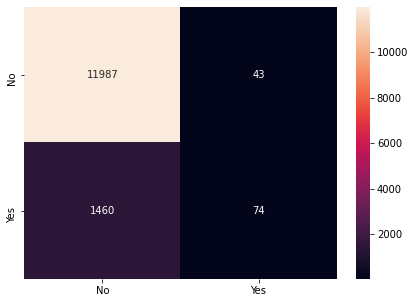

In [26]:
# Printing confusion matrix indicating recall/precision

cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index=[i for i in ["No", "Yes"]],
                    columns=[i for i in ["No", "Yes"]])

plt.figure(figsize=(7,5))
sb.heatmap(df_cm, annot=True, fmt='g')

In [27]:
# Printing metrics evaluating model performance

print("F1 Score: %.2f" % f1_score(y_test, y_pred))
print("Recall Score: %.2f" % recall_score(y_test, y_pred))
print("Precision Score: %.2f" % precision_score(y_test, y_pred))
print("ROC AUC Score: %.2f" % roc_auc_score(y_test, y_pred))

F1 Score: 0.09
Recall Score: 0.05
Precision Score: 0.63
ROC AUC Score: 0.52


In [28]:
# Storing accuracy results in a dataframe for final comparison

results = pd.DataFrame({'Method': ['Logistic Regression'], 'Accuracy': acc_log})
results = results[['Method', 'Accuracy']]

results

,Method,Accuracy
0,Logistic Regression,0.889192


In [29]:
# Invoking Decision Tree Classifier function with entropy method
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [30]:
# Fitting model to training data
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
# Printing training and test scores
print("Train accuracy: %.2f" % model_entropy.score(X_train, y_train))
print("Test accuracy: %.2f" % model_entropy.score(X_test, y_test))

Train accuracy: 1.00
Test accuracy: 0.83


In [32]:
# Pruning the tree

model_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
# Printing updated training and test scores
print("Train accuracy: %.2f" % model_pruned.score(X_train, y_train))
print("Test accuracy: %.2f" % model_pruned.score(X_test, y_test))

Train accuracy: 0.89
Test accuracy: 0.89


In [34]:
# Setting y_pred variable

y_pred = model_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, y_pred)

<AxesSubplot:>

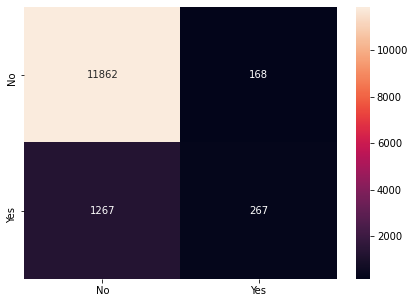

In [35]:
# Printing confusion matrix indicating recall/precision

cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index=[i for i in ["No", "Yes"]],
                    columns=[i for i in ["No", "Yes"]])

plt.figure(figsize=(7,5))
sb.heatmap(df_cm, annot=True, fmt='g')

In [36]:
# Printing metrics evaluating model performance

print("F1 Score: %.2f" % f1_score(y_test, y_pred))
print("Recall Score: %.2f" % recall_score(y_test, y_pred))
print("Precision Score: %.2f" % precision_score(y_test, y_pred))
print("ROC AUC Score: %.2f" % roc_auc_score(y_test, y_pred))

F1 Score: 0.27
Recall Score: 0.17
Precision Score: 0.61
ROC AUC Score: 0.58


In [37]:
# Displaying feature importance

feat_importance = model_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, model_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome_success,0.576536
contact_unknown,0.178930
housing_no,0.093749
month_apr,0.069729
month_mar,0.022368
housing_yes,0.013377
month_oct,0.012988
campaign,0.009755
month_nov,0.006727
day,0.006486


### Feature importance indicates that duration, poutcome_success, and contact_unknown have the most significant impact on whether or not a customer will subscribe to a term deposit.

In [38]:
# Storing accuracy results in a dataframe for final comparison

results2 = pd.DataFrame({'Method': ['Decision Tree'], 'Accuracy': acc_DT})
results = pd.concat([results, results2])
results = results[['Method', 'Accuracy']]

results

,Method,Accuracy
0,Logistic Regression,0.889192
0,Decision Tree,0.894205


In [39]:
# Building ensemble models

# Bagging model
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, random_state=7, bootstrap=True)
bgcl.fit(X_train, y_train)

BaggingClassifier(n_estimators=50, random_state=7)

In [40]:
y_pred_bg = bgcl.predict(X_test)
acc_bg = accuracy_score(y_test, y_pred_bg)

<AxesSubplot:>

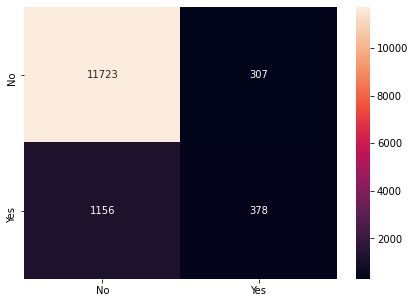

In [41]:
# Printing confusion matrix indicating recall/precision

cm=metrics.confusion_matrix(y_test, y_pred_bg, labels=[0, 1])

df_cm = pd.DataFrame(cm, index=[i for i in ["No", "Yes"]],
                    columns=[i for i in ["No", "Yes"]])

plt.figure(figsize=(7,5))
sb.heatmap(df_cm, annot=True, fmt='g')

In [42]:
# Printing metrics evaluating model performance

print("F1 Score: %.2f" % f1_score(y_test, y_pred_bg))
print("Recall Score: %.2f" % recall_score(y_test, y_pred_bg))
print("Precision Score: %.2f" % precision_score(y_test, y_pred_bg))
print("ROC AUC Score: %.2f" % roc_auc_score(y_test, y_pred_bg))

F1 Score: 0.34
Recall Score: 0.25
Precision Score: 0.55
ROC AUC Score: 0.61


In [43]:
# Storing accuracy results in a dataframe for final comparison

results2 = pd.DataFrame({'Method': ['Bagging'], 'Accuracy': acc_bg})
results = pd.concat([results, results2])
results = results[['Method', 'Accuracy']]

results

,Method,Accuracy
0,Logistic Regression,0.889192
0,Decision Tree,0.894205
0,Bagging,0.892141


In [44]:
# Adaboosting model
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=7)
abcl.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=7)

In [45]:
y_pred_ab = abcl.predict(X_test)
acc_ab = accuracy_score(y_test, y_pred_ab)

<AxesSubplot:>

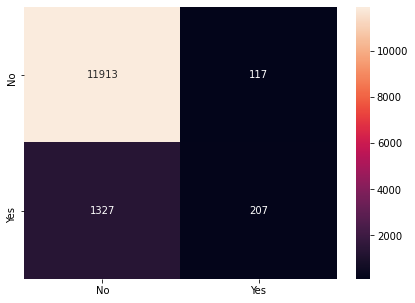

In [46]:
# Printing confusion matrix indicating recall/precision

cm=metrics.confusion_matrix(y_test, y_pred_ab, labels=[0, 1])

df_cm = pd.DataFrame(cm, index=[i for i in ["No", "Yes"]],
                    columns=[i for i in ["No", "Yes"]])

plt.figure(figsize=(7,5))
sb.heatmap(df_cm, annot=True, fmt='g')

In [47]:
# Printing metrics evaluating model performance

print("F1 Score: %.2f" % f1_score(y_test, y_pred_ab))
print("Recall Score: %.2f" % recall_score(y_test, y_pred_ab))
print("Precision Score: %.2f" % precision_score(y_test, y_pred_ab))
print("ROC AUC Score: %.2f" % roc_auc_score(y_test, y_pred_ab))

F1 Score: 0.22
Recall Score: 0.13
Precision Score: 0.64
ROC AUC Score: 0.56


In [48]:
# Storing accuracy results in a dataframe for final comparison

results2 = pd.DataFrame({'Method': ['Adaboost'], 'Accuracy': acc_ab})
results = pd.concat([results, results2])
results = results[['Method', 'Accuracy']]

results

,Method,Accuracy
0,Logistic Regression,0.889192
0,Decision Tree,0.894205
0,Bagging,0.892141
0,Adaboost,0.893542


## Conclusion
#### According to the metrics, the most accurate model is the Decision Tree Model. Even after modifying the dataset, imputing outliers, and removing the "duration" column, the differences between each model remained very slight, 0.01 or less. The dataset seems to have a very strange range of values. For example, the "pdays" variable has mostly -1 values, but the maximum value is 871. This extreme positive skewness may have an adverse effect on the predictive model, but it is difficult to estimate how.